In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, BaggingClassifier, 
                               GradientBoostingClassifier, AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import warnings
warnings.filterwarnings('ignore')

In [30]:
crop = pd.read_csv("Crop_recommendation (1).csv")

In [31]:
print("Dataset Shape:", crop.shape)
print("\nFirst 5 rows:")
print(crop.head())

Dataset Shape: (2200, 8)

First 5 rows:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [32]:
print(crop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [33]:
print("Missing Values:")
print(crop.isnull().sum())

Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [34]:
print("Number of Duplicates:", crop.duplicated().sum())

Number of Duplicates: 0


In [35]:
print(crop.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [36]:
print("Unique Crops:", crop['label'].nunique())
print("\nCrop Distribution:")
print(crop['label'].value_counts())

Unique Crops: 22

Crop Distribution:
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


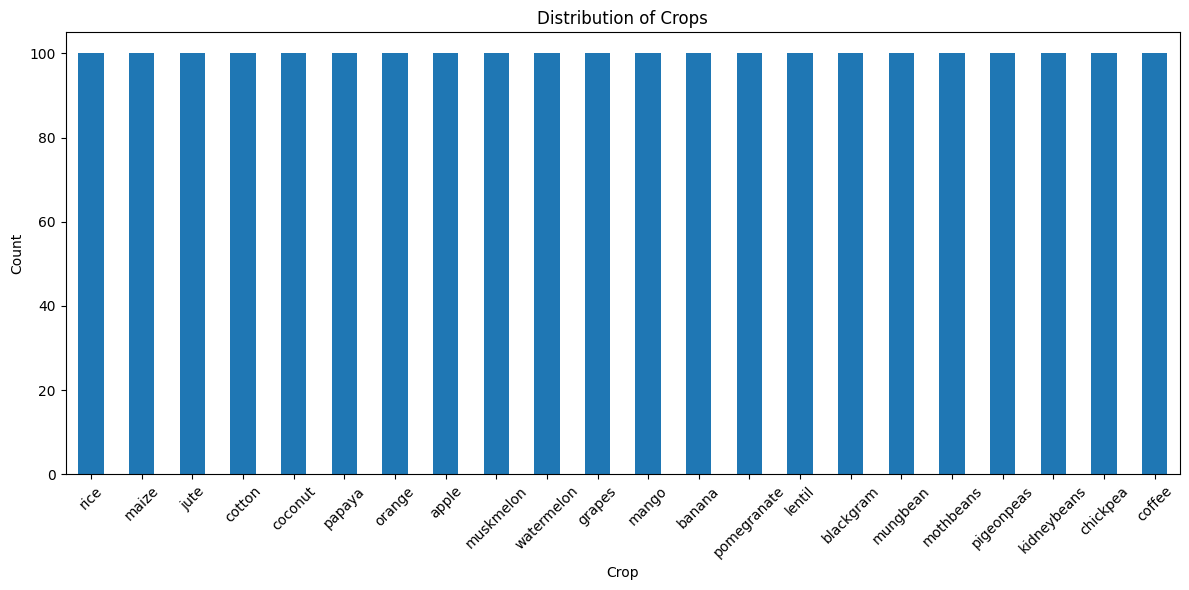

In [37]:
plt.figure(figsize=(12, 6))
crop['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Crops')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

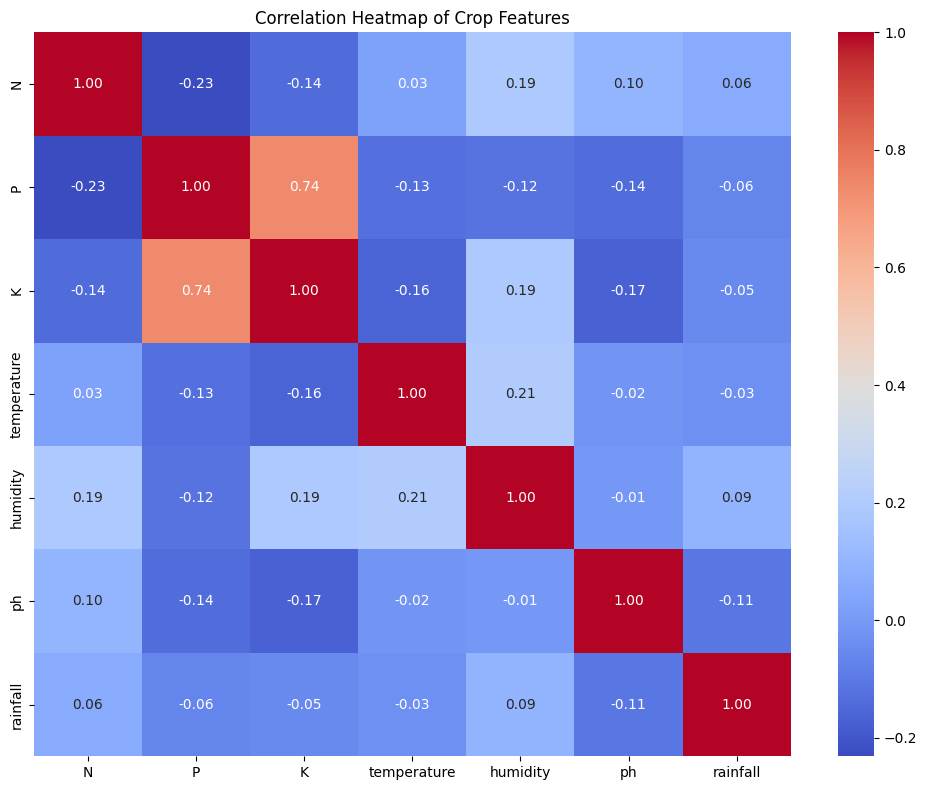

In [38]:
plt.figure(figsize=(10, 8))
numeric_cols = crop.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cbar=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Crop Features')
plt.tight_layout()
plt.show()


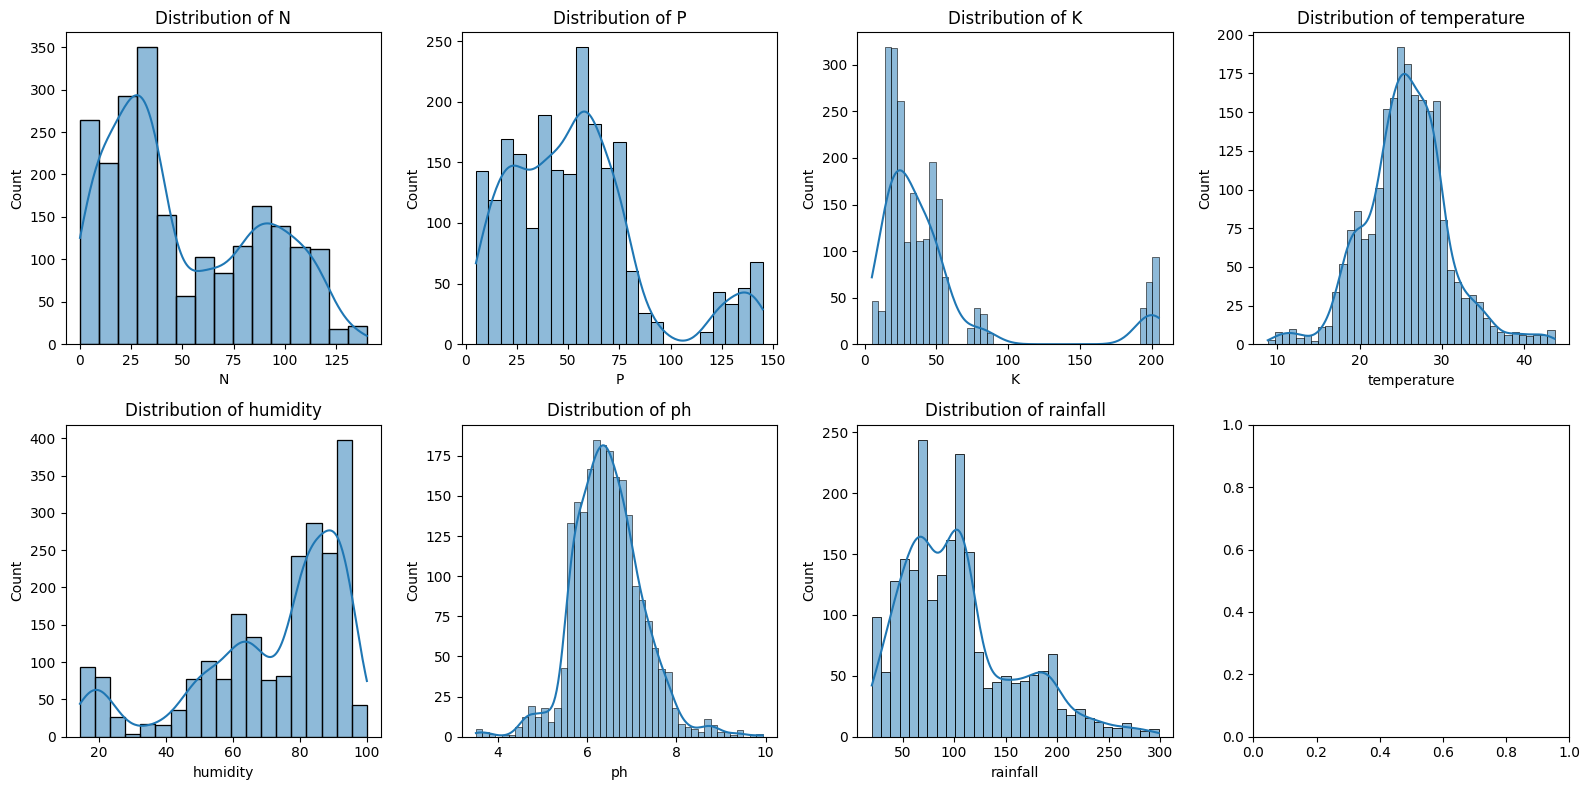

In [39]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    sns.histplot(crop[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [41]:
label_encoder = LabelEncoder()
crop['label_encoded'] = label_encoder.fit_transform(crop['label'])

# Save the mapping for reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
for crop_name, encoded_value in label_mapping.items():
    print(f"{crop_name}: {encoded_value}")

# Cell 13: Separate Features and Target
X = crop.drop(['label', 'label_encoded'], axis=1)
y = crop['label_encoded']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Label Mapping:
apple: 0
banana: 1
blackgram: 2
chickpea: 3
coconut: 4
coffee: 5
cotton: 6
grapes: 7
jute: 8
kidneybeans: 9
lentil: 10
maize: 11
mango: 12
mothbeans: 13
mungbean: 14
muskmelon: 15
orange: 16
papaya: 17
pigeonpeas: 18
pomegranate: 19
rice: 20
watermelon: 21
Features shape: (2200, 7)
Target shape: (2200,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# Cell 15: Feature Scaling
# MinMax Scaling
mx = MinMaxScaler()
X_train_scaled = mx.fit_transform(X_train)
X_test_scaled = mx.transform(X_test)

# Standard Scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_scaled)
X_test_scaled = sc.transform(X_test_scaled)

print("Scaling completed!")

Training set size: (1760, 7)
Test set size: (440, 7)
Scaling completed!


In [44]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [45]:
results = {}
print("Training Models...\n")
for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"{name}: {accuracy:.4f}")

Training Models...

Logistic Regression: 0.9727
Naive Bayes: 0.9955
Support Vector Machine: 0.9841
K-Nearest Neighbors: 0.9795
Decision Tree: 0.9795
Random Forest: 0.9955
Bagging: 0.9886
AdaBoost: 0.2273
Gradient Boosting: 0.9886


In [46]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]:.4f}")



Best Model: Naive Bayes with accuracy: 0.9955


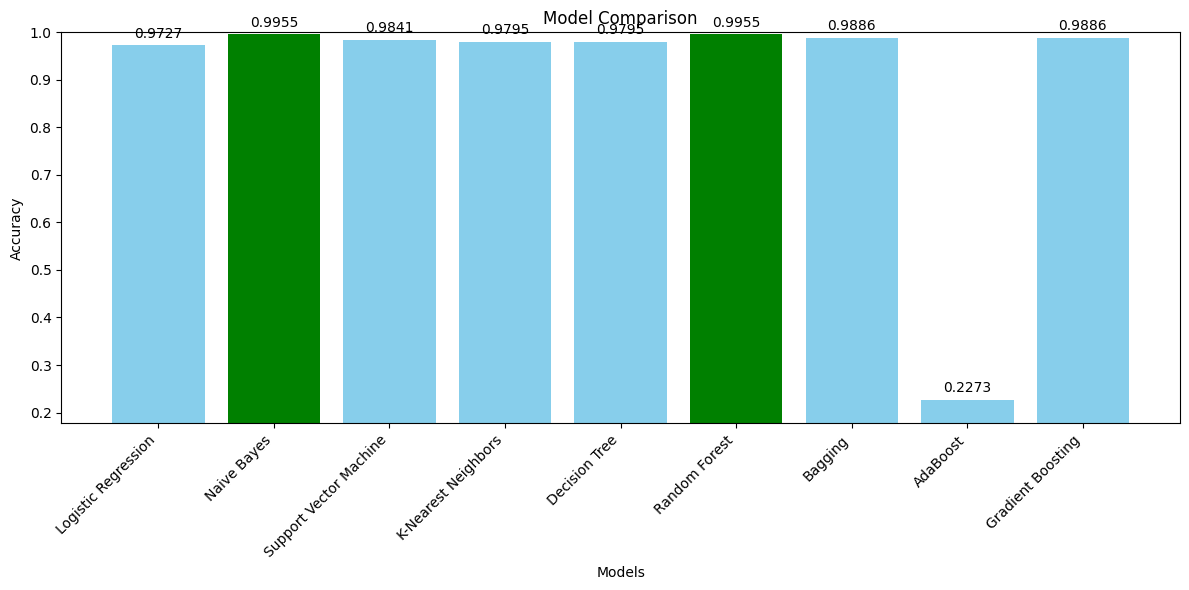

In [47]:
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
accuracies = list(results.values())
colors = ['green' if acc == max(accuracies) else 'skyblue' for acc in accuracies]

plt.bar(model_names, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim([min(accuracies) - 0.05, 1.0])

# Add value labels on bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [48]:
print(f"\nDetailed Evaluation of {best_model_name}:")
y_pred_best = best_model.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, 
                            target_names=label_encoder.classes_))


Detailed Evaluation of Naive Bayes:

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1

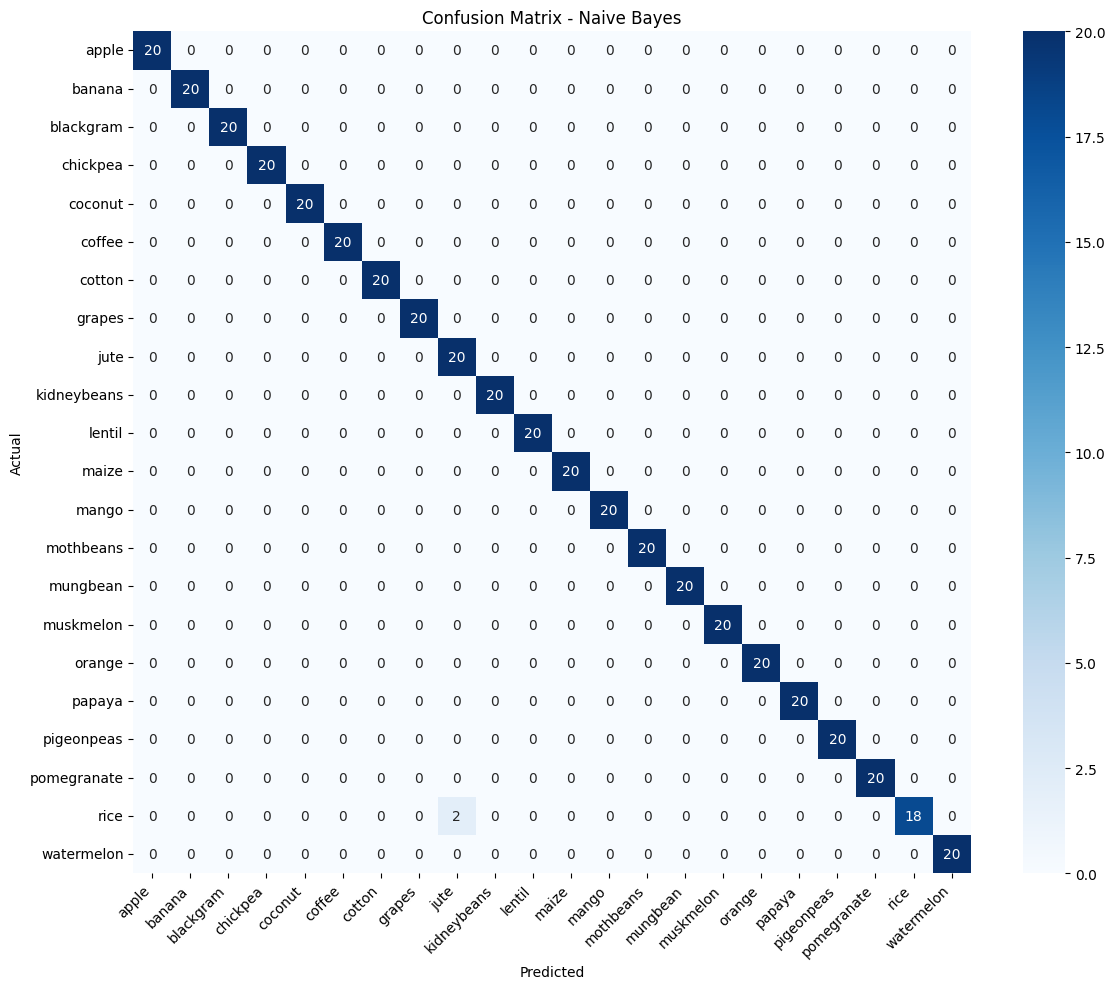

In [49]:
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [56]:
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nFeature Importance:")
    print(feature_importance)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [57]:
pickle.dump(best_model, open('model.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(label_encoder, open('label_encoder.pkl', 'wb'))
print("\nModels saved successfully!")


Models saved successfully!


In [60]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    """
    Recommend a crop based on soil and environmental conditions
    
    Parameters:
    -----------
    N : float - Nitrogen content
    P : float - Phosphorus content
    K : float - Potassium content
    temperature : float - Temperature in Celsius
    humidity : float - Relative humidity in %
    ph : float - pH value of soil
    rainfall : float - Rainfall in mm
    
    Returns:
    --------
    str : Recommended crop name
    """
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    mx_features = mx.transform(features)
    sc_mx_features = sc.transform(mx_features)
    prediction = best_model.predict(sc_mx_features)
    crop_name = label_encoder.inverse_transform(prediction)
    return crop_name[0]

In [61]:
test_data = crop.iloc[0]
print("Test Input:")
print(f"N: {test_data['N']}")
print(f"P: {test_data['P']}")
print(f"K: {test_data['K']}")
print(f"Temperature: {test_data['temperature']}")
print(f"Humidity: {test_data['humidity']}")
print(f"pH: {test_data['ph']}")
print(f"Rainfall: {test_data['rainfall']}")
print(f"\nActual Crop: {test_data['label']}")

predicted_crop = recommendation(
    test_data['N'], 
    test_data['P'], 
    test_data['K'],
    test_data['temperature'],
    test_data['humidity'],
    test_data['ph'],
    test_data['rainfall']
)
print(f"Predicted Crop: {predicted_crop}")

Test Input:
N: 90
P: 42
K: 43
Temperature: 20.87974371
Humidity: 82.00274423
pH: 6.502985292000001
Rainfall: 202.9355362

Actual Crop: rice
Predicted Crop: rice


In [62]:
print("\n" + "="*50)
print("Testing Multiple Scenarios")
print("="*50)

test_cases = [
    {
        'name': 'High Nitrogen',
        'values': [90, 42, 43, 20.87, 82.00, 6.50, 202.93]
    },
    {
        'name': 'Low Nitrogen',
        'values': [20, 80, 40, 25.00, 70.00, 6.50, 150.00]
    },
    {
        'name': 'High Rainfall',
        'values': [50, 50, 50, 24.00, 85.00, 6.80, 250.00]
    },
    {
        'name': 'Low Rainfall',
        'values': [40, 60, 45, 28.00, 65.00, 7.00, 50.00]
    }
]

for test_case in test_cases:
    values = test_case['values']
    predicted = recommendation(*values)
    print(f"\n{test_case['name']}:")
    print(f"  N={values[0]}, P={values[1]}, K={values[2]}")
    print(f"  Temp={values[3]}, Humidity={values[4]}, pH={values[5]}, Rainfall={values[6]}")
    print(f"  → Recommended Crop: {predicted}")



Testing Multiple Scenarios

High Nitrogen:
  N=90, P=42, K=43
  Temp=20.87, Humidity=82.0, pH=6.5, Rainfall=202.93
  → Recommended Crop: rice

Low Nitrogen:
  N=20, P=80, K=40
  Temp=25.0, Humidity=70.0, pH=6.5, Rainfall=150.0
  → Recommended Crop: jute

High Rainfall:
  N=50, P=50, K=50
  Temp=24.0, Humidity=85.0, pH=6.8, Rainfall=250.0
  → Recommended Crop: rice

Low Rainfall:
  N=40, P=60, K=45
  Temp=28.0, Humidity=65.0, pH=7.0, Rainfall=50.0
  → Recommended Crop: mothbeans


In [63]:
print("\n" + "="*50)
print("PROJECT SUMMARY")
print("="*50)
print(f"Total Samples: {len(crop)}")
print(f"Number of Crop Types: {crop['label'].nunique()}")
print(f"Number of Features: {len(X.columns)}")
print(f"Train/Test Split: 80/20")
print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {results[best_model_name]:.4f}")
print(f"\nAll Models Trained:")
for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"  {name}: {acc:.4f}")

print("\n" + "="*50)
print("Models saved as:")
print("  - model.pkl (best model)")
print("  - standscaler.pkl")
print("  - minmaxscaler.pkl")
print("  - label_encoder.pkl")
print("="*50)


PROJECT SUMMARY
Total Samples: 2200
Number of Crop Types: 22
Number of Features: 7
Train/Test Split: 80/20

Best Model: Naive Bayes
Best Accuracy: 0.9955

All Models Trained:
  Naive Bayes: 0.9955
  Random Forest: 0.9955
  Bagging: 0.9886
  Gradient Boosting: 0.9886
  Support Vector Machine: 0.9841
  K-Nearest Neighbors: 0.9795
  Decision Tree: 0.9795
  Logistic Regression: 0.9727
  AdaBoost: 0.2273

Models saved as:
  - model.pkl (best model)
  - standscaler.pkl
  - minmaxscaler.pkl
  - label_encoder.pkl
